In [1]:
import numpy as np
import tensorflow as tf
#import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization,LSTM,TimeDistributed
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
train_dir="/Users/aishaandatt/Downloads/IBM/faces"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 9094 images belonging to 95 classes.


In [3]:
# import os
# from PIL import Image
# folder_path = 'lfw-deepfunneled'
# extensions = []
# for fldr in os.listdir(folder_path):
#     sub_folder_path = os.path.join(folder_path, fldr)
#     for filee in os.listdir(sub_folder_path):
#         file_path = os.path.join(sub_folder_path, filee)
#         print('** Path: {}  **'.format(file_path), end="\r", flush=True)
#         im = Image.open(file_path)
#         rgb_im = im.convert('RGB')
#         if filee.split('.')[1] not in extensions:
#             extensions.append(filee.split('.')[1])

In [4]:
train_ds.image_shape

(224, 224, 3)

In [5]:
classes

['Aamir_Khan',
 'Abhay_Deol',
 'Abhishek_Bachchan',
 'Aftab_Shivdasani',
 'Aishwarya_Rai',
 'Ajay_Devgn',
 'Akshay_Kumar',
 'Akshaye_Khanna',
 'Alia_Bhatt',
 'Ameesha_Patel',
 'Amitabh_Bachchan',
 'Amrita_Rao',
 'Amy_Jackson',
 'Anil_Kapoor',
 'Anushka_Sharma',
 'Anushka_Shetty',
 'Arjun_Kapoor',
 'Arjun_Rampal',
 'Arshad_Warsi',
 'Asin',
 'Ayushmann_Khurrana',
 'Bhumi_Pednekar',
 'Bipasha_Basu',
 'Bobby_Deol',
 'Deepika_Padukone',
 'Disha_Patani',
 'Emraan_Hashmi',
 'Esha_Gupta',
 'Farhan_Akhtar',
 'Hrithik_Roshan',
 'Huma_Qureshi',
 'Ileana_DΓÇÖCruz',
 'Irrfan_Khan',
 'Jacqueline_Fernandez',
 'John_Abraham',
 'Juhi_Chawla',
 'Kajal_Aggarwal',
 'Kajol',
 'Kangana_Ranaut',
 'Kareena_Kapoor',
 'Kartik_Aaryan',
 'Katrina_Kaif',
 'Kiara_Advani',
 'Kiara_Advani copy',
 'Kriti_Kharbanda',
 'Kriti_Sanon',
 'Kunal_Khemu',
 'Lara_Dutta',
 'Madhuri_Dixit',
 'Manoj_Bajpayee',
 'Mrunal_Thakur',
 'Nana_Patekar',
 'Nargis_Fakhri',
 'Naseeruddin_Shah',
 'Nushrat_Bharucha',
 'Paresh_Rawal',
 'Parinee

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
newnew = Sequential()
newnew.add(TimeDistributed(model))
newnew.add(LSTM(100))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))


In [15]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 64)       

In [16]:
history = model.fit(train_ds,epochs= 11, batch_size=32)

Epoch 1/11
285/285 [==============================] - 296s 1s/step - loss: 4.2365 - accuracy: 0.0561
Epoch 2/11
285/285 [==============================] - 278s 975ms/step - loss: 3.3798 - accuracy: 0.1753
Epoch 3/11
285/285 [==============================] - 307s 1s/step - loss: 2.5912 - accuracy: 0.3348
Epoch 4/11
285/285 [==============================] - 304s 1s/step - loss: 1.9076 - accuracy: 0.4915
Epoch 5/11
285/285 [==============================] - 275s 964ms/step - loss: 1.3886 - accuracy: 0.6280
Epoch 6/11
285/285 [==============================] - 276s 968ms/step - loss: 1.0043 - accuracy: 0.7277
Epoch 7/11
285/285 [==============================] - 284s 997ms/step - loss: 0.7436 - accuracy: 0.7959
Epoch 8/11
285/285 [==============================] - 284s 995ms/step - loss: 0.5719 - accuracy: 0.8376
Epoch 9/11
285/285 [==============================] - 284s 995ms/step - loss: 0.4136 - accuracy: 0.8835
Epoch 10/11
285/285 [==============================] - 299s 1s/step - los

In [17]:
model.save('Model_Harr_Coloured.h5')

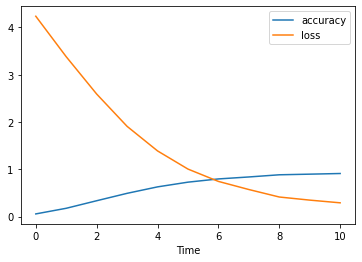

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [19]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

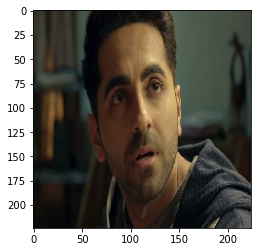

Actual: 1539880753article
Predicted: Kiara_Advani copy


In [21]:
predict_image("/Users/aishaandatt/Downloads/IBM/1539880753article_img.jpeg")